### > In this project, I've choosen the country, named Portugal which I've been interested in a long time. 

### > At this project, I've found & applied to the data two different datasets about Portugal that named as 'Portugal Wine Quality' and 'Portugal Fire Forests'.

### > So this project contains two data science applications on two different datasets in one code and about one country, as written as in the homwork description.

### Section of Wine Quality

In [29]:
!pip install openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
data0 = pd.DataFrame(pd.read_excel('Wine.xlsx'))

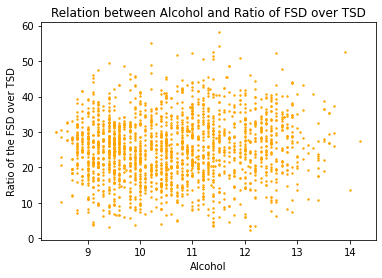

In [31]:
# First of all we are going to investigate the relation between two features.
# As long as alcohol rises, what happens to the raito of; 
# free sulfur dioxide over total sulfur dioxide?

data0 = data0.sort_values('alcohol')

x = data0['alcohol'].values
y0 = list(data0['free_sulfur_dioxide'])
y1 = list(data0['total_sulfur_dioxide'])
y = []

for i,z in zip(y0,y1):
    y.append((i/z)*100)


# Adding X,Y values to the plot.
plt.scatter(x,y,color="orange",s=2)

# Final Part.
plt.title("Relation between Alcohol and Ratio of FSD over TSD")
plt.xlabel("Alcohol")
plt.ylabel("Ratio of the FSD over TSD")
plt.show()

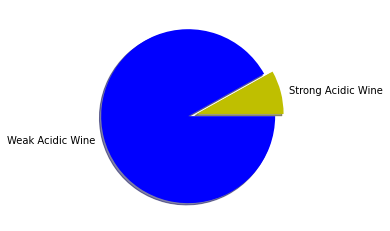


 Strong: %8.1 Weak: %91.9


In [32]:
# Let us look for the pH ratio about being above 3 and below 3, which we gonna name them as;
# strong acid wine and weak acid wine.

wine_types = 'Strong Acidic Wine','Weak Acidic Wine'
c = ['y','b']

weak,strong = [], []

for i in list(data0['pH']):
    if i<3:
        strong.append(i)
    else:
        weak.append(i)

wines = [len(strong),len(weak)]

plt.pie(wines,labels=wine_types,colors=c, shadow=True, explode=(0.05,0.05))
plt.show()
print(f'\n Strong: %{round((len(strong)/sum(wines))*100,2)} Weak: %{round((len(weak)/sum(wines))*100,2)}')

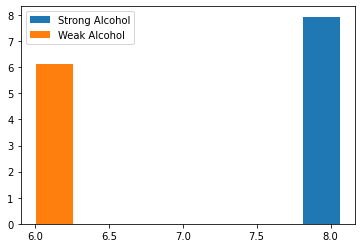

In [33]:
# For the last example of the portoguese wines, I would like to look up for the;
# a spesific feature which is the pH value's effect on residual sugar.
# First of all, we are going to went through to the last graph as we;
# mentioned about strong/weak acids.
# The thing we are going to do is;
# Finsing the overall residual sugar rate of both strong and weak acidic wines.

data0 = data0.sort_values('pH')

weak,strong = [], []
weak_sugar,strong_sugar = [], []

for i,f in zip(list(data0['pH']),list(data0['residual_sugar'])):
    if i<3:
        strong.append(i)
        strong_sugar.append(f)
    else:
        weak.append(i)
        weak_sugar.append(f)

strong_ovr = (sum(strong_sugar)/len(strong_sugar))
weak_ovr = (sum(weak_sugar)/len(weak_sugar))

y = [strong_ovr,weak_ovr]
x = [round(strong_ovr,2),round(weak_ovr,2)]

# Then, we are going to represent it on the bar plot.
fig, ax = plt.subplots()
p1 = ax.bar(x[0], height = y[0], width=.25, label='Strong Alcohol')
p2 = ax.bar(x[1], height = y[1], width=.25, label='Weak Alcohol')
plt.legend()
plt.show()

### Section of Forest Fires

In [9]:
data1 = pd.DataFrame(pd.read_excel('Forest Fires.xlsx'))

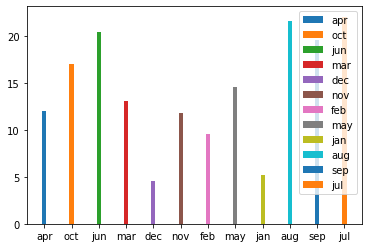

In [34]:
# First of all we are going to investigate the relation between two features.
# Features that month and the temperature, actually is there any sign that;
# In some kind of months, the temperature is actually would be higher/lower than the others?

mon, tem, mons = list(set(list(data1['month']))), [], {}
for i in mon:
    mons[i] = []

for i,j in zip(list(data1['month']),list(data1['temp'])):
    mons[i].append(j)

for j in mon:
    avg = sum(mons[j])/len(mons[j])
    tem.append(avg)

x = mon
y = tem

# Then, we are going to represent it on the bar plot.
fig, ax = plt.subplots()
p1 = ax.bar(x[0], height = y[0], width=.15, label=x[0])
p2 = ax.bar(x[1], height = y[1], width=.15, label=x[1])
p3 = ax.bar(x[2], height = y[2], width=.15, label=x[2])
p4 = ax.bar(x[3], height = y[3], width=.15, label=x[3])
p5 = ax.bar(x[4], height = y[4], width=.15, label=x[4])
p6 = ax.bar(x[5], height = y[5], width=.15, label=x[5])
p7 = ax.bar(x[6], height = y[6], width=.15, label=x[6])
p8 = ax.bar(x[7], height = y[7], width=.15, label=x[7])
p9 = ax.bar(x[8], height = y[8], width=.15, label=x[8])
p10 = ax.bar(x[9], height = y[9], width=.15, label=x[9])
p11 = ax.bar(x[10], height = y[10], width=.15, label=x[10])
p12 = ax.bar(x[11], height = y[11], width=.15, label=x[11])
plt.legend()
plt.show()

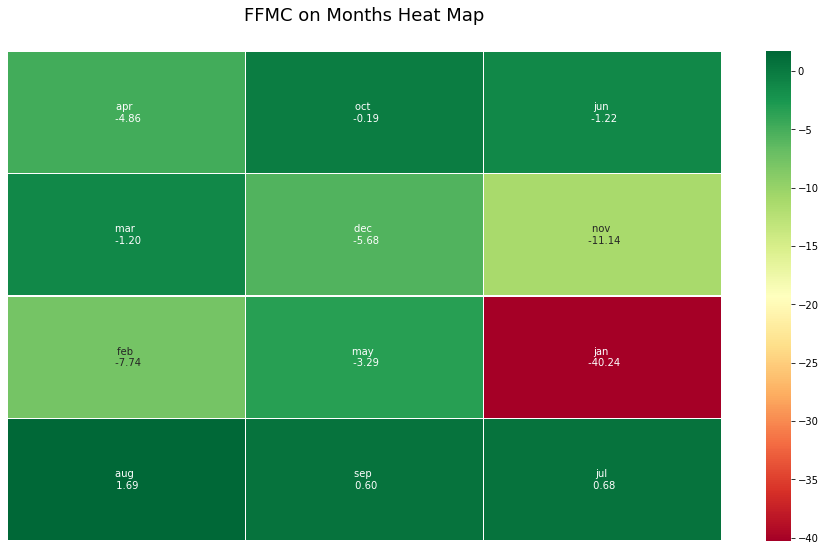

In [35]:
# Now, we are going into deeper.
# In this section, we are going to prepare a heatmap based on 'FFMC' value.
# First we are going to find the overall FFMC value then;
# we are going to apply that overall value and find the +/- difference based on months.

list_ffmc = list(data1['FFMC'])
avg_ffmc = sum(list_ffmc)/len(list_ffmc)

mon,FFMC, mons = list(set(list(data1['month']))), [], {}
for i in mon:
    mons[i] = []

for i,j in zip(list(data1['month']),list(data1['FFMC'])):
    mons[i].append(j)

for j in mon:
    avg = sum(mons[j])/len(mons[j])
    FFMC.append(avg)

differentiation = []

for i in FFMC:
    differentiation.append(i-avg_ffmc)

df = pd.DataFrame()
df['Months'] = mon
df['Change'] = differentiation
df['YR'] = [1,1,1,1,1,1,2,2,2,2,2,2]
df['XC'] = [1,1,1,1,1,1,2,2,2,2,2,2]

MONTHS = ((np.asarray(df['Months'])).reshape(4,3))
CHANGE = ((np.asarray(df['Change'])).reshape(4,3))

change_df = pd.DataFrame(CHANGE)

labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value) for symb, value in zip(MONTHS.flatten(),CHANGE.flatten())])).reshape(4,3)

# Defining the plot.
fig, ax = plt.subplots(figsize=(16,9))

# Add title to the heat map.
title = "FFMC on Months Heat Map"

# Set the font size and the distance of the title from the plot.
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis.
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes.
ax.axis('off')

# Use the heat map function from the seaborn package.
sns.heatmap(change_df,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

# Displayer of the pharma sector heatmap.
plt.show()

### Our data science & data analyze project has done here, as a conclusion I tried my best to open up some comment sections & rows for further questions and make it more understandable.